## Analysis of a car sell record Dataset

We have been provided with a car sell record dataset. In this dataset, we have thounds of car sell records.

The structure of this dataset is represented in the header shown below.

name
year
selling_price
km_driven
fuel
seller_type
transmission
Owner

| name | year | selling_price | km_driven| fuel | seller_type | transmission | Owner |

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |   
    
#### Description of Fields

* __name__ - detail car type of the sold car
* __year__ - Year of the car when it was bought
* __selling_price__ - Price at which the car is being sold
* __km_driven__ - Number of Kilometres the car is driven
* __fuel__ - Fuel type of car (petrol / diesel / CNG / LPG / electric)
* __seller_type__ - Tells if a Seller is Individual or a Dealer
* __transmission__ - Gear transmission of the car (Automatic/Manual)
* __owner__ - Number of previous owners of the car.

There are four questions to explore with the data as shown below.


In [405]:
your_name = "Namah Kumar"
your_student_id = "47608811"

In [406]:
# libraries you might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# if you are using google colab with google drive, you could read files from google drive with the following codes
# from google.colab import drive
# drive.mount('/content/drive')

 ## Q1. Remove missing data

Please remove the records that match ANY of the below two conditions in the csv file:

 * year is missing
 * fuel is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [408]:
#displayed DataFrames before removing missing data
df = pd.read_csv('car_sell.csv')
print('this is the data frame', df)
print('--------------------------------------------------------')
print('this is the length of the data:', df.shape[0])
print('--------------------------------------------------------')
#finding the number of null values in each column
name_nan_count = df['name'].isna().sum()
year_nan_count=df['year'].isna().sum()
selling_price_nan_count=df['selling_price'].isna().sum()
km_driven_nan_count=df['km_driven'].isna().sum()
fuel_nan_count=df['fuel'].isna().sum()
seller_type_nan_count=df['seller_type'].isna().sum()
transmission_nan_count=df['transmission'].isna().sum()
owner_nan_count=df['owner'].isna().sum()
#print values
print('name nan count:', name_nan_count)
print('year nan count:', year_nan_count)
print('selling price nan count:', selling_price_nan_count)
print('kms driven nan count:', km_driven_nan_count)
print('fuel nan count:', fuel_nan_count)
print('seller nan count:',seller_type_nan_count)
print('transmission nan count:', transmission_nan_count)
print('owner nan count:',owner_nan_count)

this is the data frame       Unnamed: 0                                 name    year  selling_price  \
0              0                        Maruti 800 AC  2007.0          60000   
1              1             Maruti Wagon R LXI Minor  2007.0         135000   
2              2                 Hyundai Verna 1.6 SX  2012.0         600000   
3              3               Datsun RediGO T Option  2017.0         250000   
4              4                Honda Amaze VX i-DTEC  2014.0         450000   
...          ...                                  ...     ...            ...   
4335        4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014.0         409999   
4336        4336           Hyundai i20 Magna 1.4 CRDi  2014.0         409999   
4337        4337                  Maruti 800 AC BSIII  2009.0         110000   
4338        4338     Hyundai Creta 1.6 CRDi SX Option  2016.0         865000   
4339        4339                     Renault KWID RXT  2016.0         225000   

      km_driven 

In [409]:
# DataFrames after removing data
df.dropna(subset=['year'], inplace=True)
df= df.drop(df[df['fuel'] == 'none'].index)
print('the number of values afterward:', df.shape[0])



the number of values afterward: 3886


## Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
* Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
* Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type
* Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type


In [411]:
#Q2.1 total number of unique name, unique seller_type, unique transmission, and unique owner
unique_names=df['name'].nunique()
unique_seller_type=df['seller_type'].nunique()
unique_transmission=df['transmission'].nunique()
unique_owners=df['owner'].nunique()

#Results
print('total number of unique names:',unique_names) 
print('total number of unique seller types:',unique_seller_type) 
print('total number of unique transmissions:',unique_transmission) 
print('total number of unique owners:',unique_owners) 

total number of unique names: 1402
total number of unique seller types: 3
total number of unique transmissions: 2
total number of unique owners: 5


In [412]:
#Q2.2 descriptive statistics, including the total number, mean, std, min and max regarding all km_driven
total_count = df['km_driven'].sum()
mean_value = df['km_driven'].mean()
std_value = df['km_driven'].std()
min_value = df['km_driven'].min()
max_value = df['km_driven'].max()

#Results
print('Total number of km driven:',total_count)
print('Mean km driven:' , mean_value)
print('Standard deviation of km driven:', std_value)
print('Minimum km driven:',min_value)
print('Maximum km driven:',max_value)

Total number of km driven: 257693403
Mean km driven: 66313.27920741122
Standard deviation of km driven: 46679.603915975706
Minimum km driven: 1
Maximum km driven: 806599


In [413]:
#Q2.3 descriptive statistics, including mean, std, max, and min of the number of selling_price grouped by different seller_type

# data for dealer sold cars
Dealer_cars_Sold = df[df['seller_type'] == 'Dealer']['selling_price'].count()
Dealer_mean_Sellingprice = df[df['seller_type'] == 'Dealer']['selling_price'].mean()
Dealer_std = df[df['seller_type'] == 'Dealer']['selling_price'].std()
Dealer_max = df[df['seller_type'] == 'Dealer']['selling_price'].max()
Dealer_min = df[df['seller_type'] == 'Dealer']['selling_price'].min()
print('----------------------------------------------------------------------------------------------')
print('the number of cars sold by dealers:', Dealer_cars_Sold)
print('the average selling price of a dealer is:', Dealer_mean_Sellingprice)
print('the standard deviation of dealer sold cars is:', Dealer_std)
print('the moxt expensive dealer sold car is:', Dealer_max)
print('the least expensive dealer sold car is:', Dealer_min)

#data for individually sold cars
Individual_cars_Sold = df[df['seller_type'] == 'Individual']['selling_price'].count()
Individual_mean_Sellingprice = df[df['seller_type'] == 'Individual']['selling_price'].mean()
Individual_std = df[df['seller_type'] == 'Individual']['selling_price'].std()
Individual_max = df[df['seller_type'] == 'Individual']['selling_price'].max()
Individual_min = df[df['seller_type'] == 'Individual']['selling_price'].min()
print('----------------------------------------------------------------------------------------------')
print('the number of cars sold by an individual:', Individual_cars_Sold)
print('the average selling price of an individual is:', Individual_mean_Sellingprice)
print('the standard deviation of an individual sold cars is:', Individual_std)
print('the moxt expensive individual sold car is:', Individual_max)
print('the least expensive individual sold car is:', Individual_min)

#data for trustmark dealer sold cars
Trustmark_Dealer_cars_Sold = df[df['seller_type'] == 'Trustmark Dealer']['selling_price'].count()
Trustmark_Dealer_mean_Sellingprice = df[df['seller_type'] == 'Trustmark Dealer']['selling_price'].mean()
Trustmark_Dealer_std = df[df['seller_type'] == 'Trustmark Dealer']['selling_price'].std()
Trustmark_Dealer_max = df[df['seller_type'] == 'Trustmark Dealer']['selling_price'].max()
Trustmark_Dealer_min = df[df['seller_type'] == 'Trustmark Dealer']['selling_price'].min()
print('----------------------------------------------------------------------------------------------')
print('the number of cars sold by Trustmark_Dealer_min:', Trustmark_Dealer_cars_Sold)
print('the average selling price of a Trustmark_Dealer_min is:', Trustmark_Dealer_mean_Sellingprice)
print('the standard deviation of Trustmark_Dealer_min sold cars is:', Trustmark_Dealer_std)
print('the moxt expensive Trustmark_Dealer_min sold car is:', Trustmark_Dealer_max)
print('the least expensive Trustmark_Dealer_min sold car is:', Trustmark_Dealer_min)





----------------------------------------------------------------------------------------------
the number of cars sold by dealers: 889
the average selling price of a dealer is: 702093.3149606299
the standard deviation of dealer sold cars is: 813597.811831924
the moxt expensive dealer sold car is: 8900000
the least expensive dealer sold car is: 22000
----------------------------------------------------------------------------------------------
the number of cars sold by an individual: 2903
the average selling price of an individual is: 421169.41026524286
the standard deviation of an individual sold cars is: 420273.68412882165
the moxt expensive individual sold car is: 4800000
the least expensive individual sold car is: 20000
----------------------------------------------------------------------------------------------
the number of cars sold by Trustmark_Dealer_min: 94
the average selling price of a Trustmark_Dealer_min is: 935797.8723404255
the standard deviation of Trustmark_Dealer_mi

In [414]:
#Q2.4 descriptive statistics, including mean, std, max, min of the number of years that sold by each owner type
mean_Fowners_years = df[df['owner'] == 'First Owner']['year'].mean()
std_Fowners_years = df[df['owner'] == 'First Owner']['year'].std()
max_Fowners_years = df[df['owner'] == 'First Owner']['year'].max()
min_Fowners_years = df[df['owner'] == 'First Owner']['year'].min()


#statistics for first owned cars
print('mean year of first owned cars:', mean_Fowners_years)
print('standard deviation of first owner car year:',std_Fowners_years)
print('youngest sold first owned car:' ,max_Fowners_years)
print('oldest first owned car sold:', min_Fowners_years)
print('---------------------')

#statistics for second owned cars
mean_Sowners_years = df[df['owner'] == 'Second Owner']['year'].mean()
std_Sowners_years = df[df['owner'] == 'Second Owner']['year'].std()
max_Sowners_years = df[df['owner'] == 'Second Owner']['year'].max()
min_Sowners_years = df[df['owner'] == 'Second Owner']['year'].min()

print('mean year of second owned cars:',mean_Sowners_years)
print('standard deviation of second owner car year:', std_Sowners_years)
print('youngest sold second owned car:' ,max_Sowners_years)
print('oldest second owned car sold:',min_Sowners_years)
print('---------------------')

#statistics for third owned cars
mean_Towners_years = df[df['owner'] == 'Third Owner']['year'].mean()
std_Towners_years = df[df['owner'] == 'Third Owner']['year'].std()
max_Towners_years = df[df['owner'] == 'Third Owner']['year'].max()
min_Towners_years = df[df['owner'] == 'Third Owner']['year'].min()

print('mean year of third owned cars:',mean_Towners_years)
print('std of third owned cars:',std_Towners_years)
print('youngest sold third owned car:',max_Towners_years)
print('oldest sold second owned car:',min_Towners_years)
print('---------------------')

#statistics for fourth and above owned cars
mean_FourthAboveOwners_years = df[df['owner'] == 'Fourth & Above Owner']['year'].mean()
std_FourthAboveOwners_years = df[df['owner'] == 'Fourth & Above Owner']['year'].std()
max_FourthAboveOwners_years = df[df['owner'] == 'Fourth & Above Owner']['year'].max()
min_FourthAboveOwners_years = df[df['owner'] == 'Fourth & Above Owner']['year'].min()

print('mean year of Fourth and above owned cars:', mean_FourthAboveOwners_years)
print('std of Fourth and above owned cars:',std_FourthAboveOwners_years)
print('youngest Fourth and above owned car:',max_FourthAboveOwners_years)
print('oldest Fourth and above owned car:',min_FourthAboveOwners_years)
print('---------------------')

#statistics for test driven cars
mean_TestDrive_years = df[df['owner'] == 'Test Drive Car']['year'].mean()
std_TestDrive_years = df[df['owner'] == 'Test Drive Car']['year'].std()
max_TestDrive_years = df[df['owner'] == 'Test Drive Car']['year'].max()
min_TestDrive_years = df[df['owner'] == 'Test Drive Car']['year'].min()

print('mean age of test driven cars owned:',mean_TestDrive_years)
print('std of test driven cars owned:',std_TestDrive_years)
print('youngest test driven car owned:',max_TestDrive_years)
print('oldest test driven car owned:',min_TestDrive_years)
print('---------------------')


mean year of first owned cars: 2014.4537914691944
standard deviation of first owner car year: 3.555597453653635
youngest sold first owned car: 2020.0
oldest first owned car sold: 1996.0
---------------------
mean year of second owned cars: 2010.977
standard deviation of second owner car year: 3.84099260923844
youngest sold second owned car: 2019.0
oldest second owned car sold: 1995.0
---------------------
mean year of third owned cars: 2009.4139194139193
std of third owned cars: 3.9202655532741426
youngest sold third owned car: 2019.0
oldest sold second owned car: 1997.0
---------------------
mean year of Fourth and above owned cars: 2007.2388059701493
std of Fourth and above owned cars: 5.24863489391868
youngest Fourth and above owned car: 2020.0
oldest Fourth and above owned car: 1992.0
---------------------
mean age of test driven cars owned: 2019.642857142857
std of test driven cars owned: 0.6333236937766509
youngest test driven car owned: 2020.0
oldest test driven car owned: 2018.

## Q3. Plotting and Analysis

Please try to explore the correlation between fuel/year/seller_type/transmission/owner and selling_price; for instance, do First Owner cars tend to sell higher prices than second owner cars? Hint: you may use the boxplot function to plot figures for comparison
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you are required to provide an overall summary of your findings from the plots you generated.

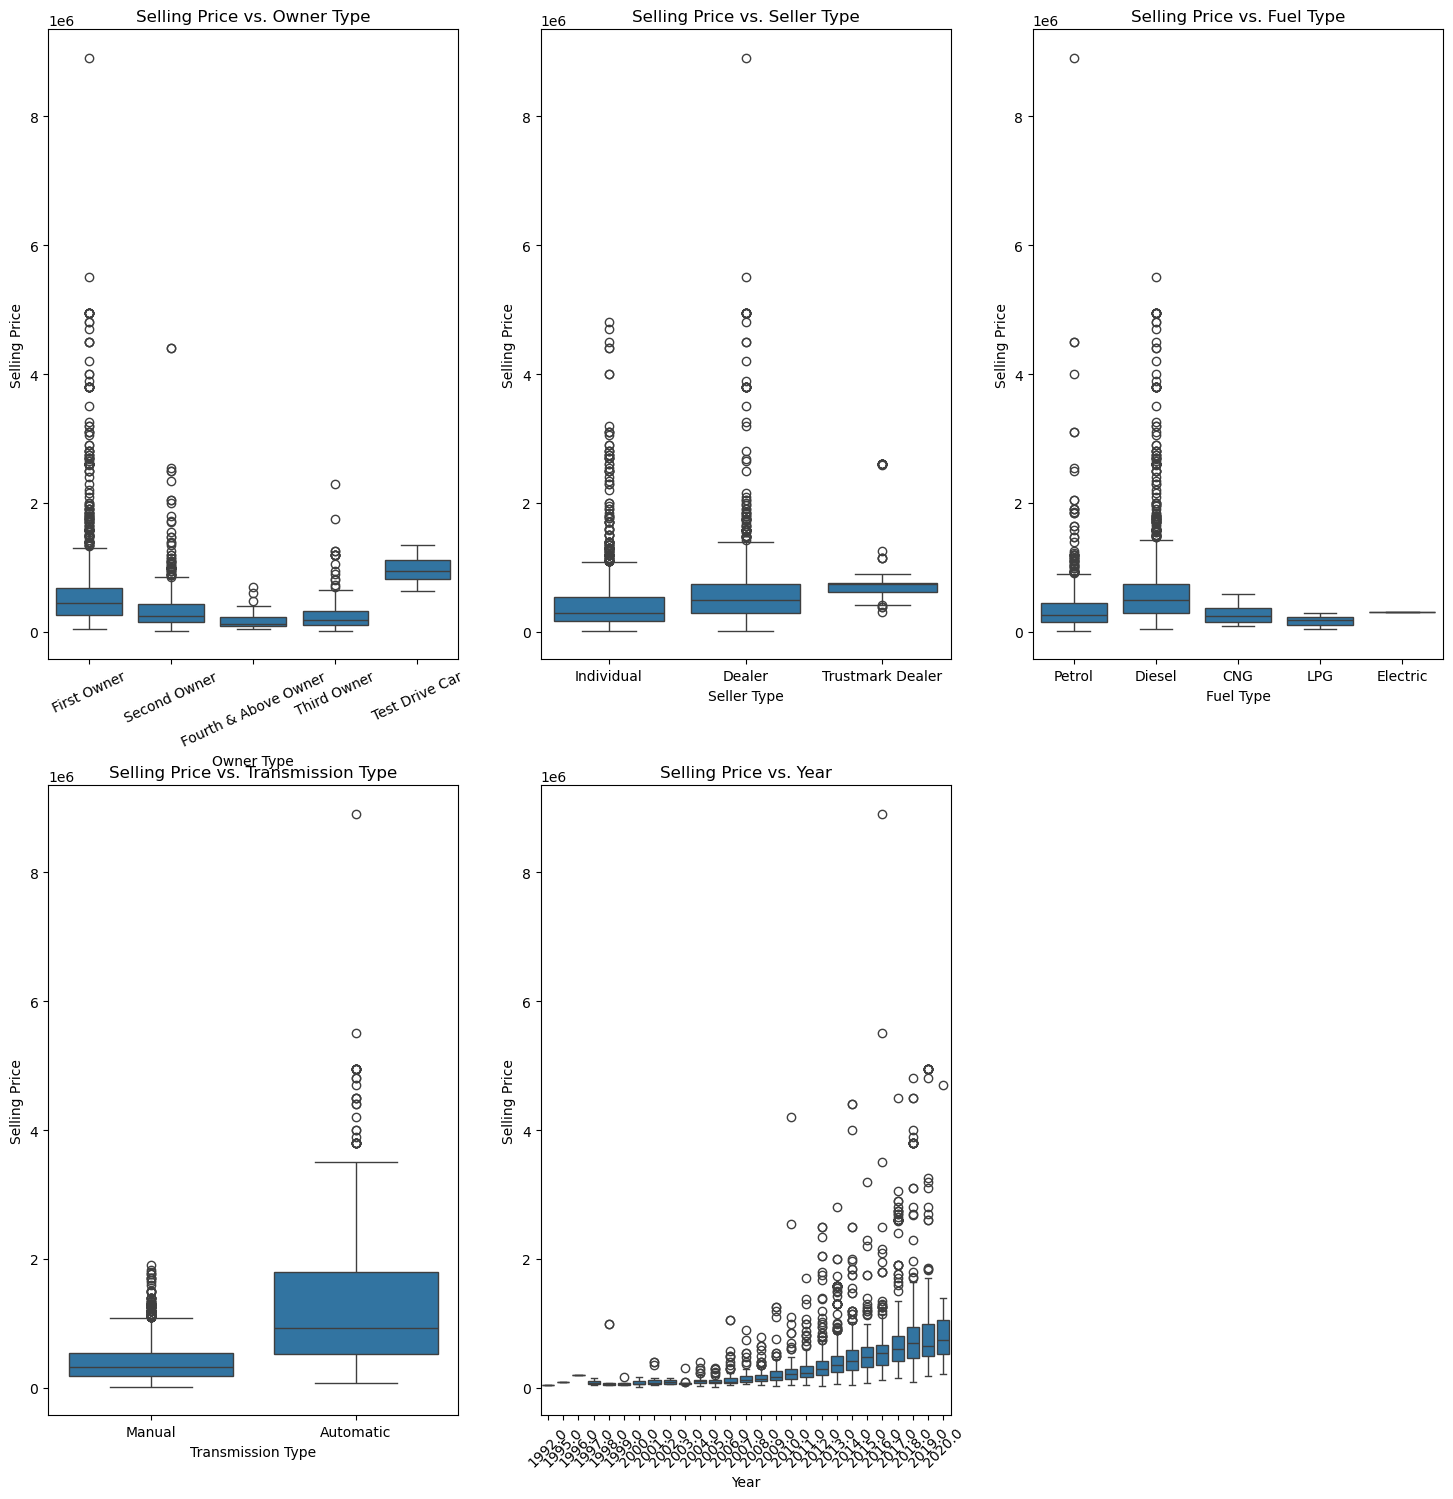

from these graphs, we can determine that newer cars are overall sold for higher prices that older cars.
Moreover, dealers sell their cars for the most whilst individuals are more likely to sell their cars for the least.
Also, diesel cars are the most expensive car type and automatic cars are more used than manual cars.
Lastly, there is a steady increase in the prices of cars sold closer to modern day than 1992.


In [416]:


# Set the figure size for clarity
plt.figure(figsize=(18, 18))

# 1. Selling Price vs. Owner Type
plt.subplot(2, 3, 1)
sns.boxplot(x='owner', y='selling_price', data=df)
plt.title('Selling Price vs. Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.xticks(rotation=25)
#SUMMARY
# this plot shows that newer cars such as first owned cars and test driven cars are more likely to be sold at an expensive price due to market demand

# 2. Selling Price vs. Seller Type
plt.subplot(2, 3, 2)
sns.boxplot(x='seller_type', y='selling_price', data=df)
plt.title('Selling Price vs. Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
#SUMMARY
#this plot shows that dealers sell cars for the most compared to individuals

# 3. Selling Price vs. Fuel Type
plt.subplot(2, 3, 3)
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
#SUMMARY
#this plot shows that diesel cars are the most expensive car type to buy

# 4. Selling Price vs. Transmission Type
plt.subplot(2, 3, 4)
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Selling Price vs. Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
#SUMMARY
#this shows that automatic cars have a wider range of selling prices compared to manual cars

# 5. Selling Price vs. Year
plt.subplot(2, 3, 5)
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
#SUMMARY
#this plot shows that on average, all cars sold are more expensive as time gets closer to current day


# show plots
plt.show()

#OVERALL SUMMARY
print("""from these graphs, we can determine that newer cars are overall sold for higher prices that older cars.
Moreover, dealers sell their cars for the most whilst individuals are more likely to sell their cars for the least.
Also, diesel cars are the most expensive car type and automatic cars are more used than manual cars.
Lastly, there is a steady increase in the prices of cars sold closer to modern day than 1992.""")



## Q4. Detect and remove outliers

We define car sale records WITHOUT following ANY of the below three rules as outliers:

1. owner to be first, second and third owner only
2. Fuel to be Diesel or Petrol only
3. Seller_type to be dealer or individual only

Please remove the corresponding records in the csv file that is not qualified with the rules. After that, __print the length of the data__.

In [429]:
# Number of records after filtering
filtered_df = df[
    (df['owner'].isin(['First Owner', 'Second Owner', 'Third Owner'])) &
    (df['fuel'].isin(['Diesel', 'Petrol'])) &
    (df['seller_type'].isin(['Dealer', 'Individual']))
]

# Print the length
filtered_length = len(filtered_df)
print("Number of records after removing outliers:", filtered_length)


Number of records after removing outliers: 3657
